In [1]:
import pandas as pd
file_name = '/root/quoc/FinanceLearn/data/tr_eikon_eod_data.csv'
data = pd.read_csv(file_name,index_col=False)
data.head()

,Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
0,2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
1,2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2,2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
3,2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
4,2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


In [14]:
data.plot(figsize=(10, 12), subplots=True); 
instruments = ['Apple Stock', 'Microsoft Stock',
 'Intel Stock', 'Amazon Stock', 'Goldman Sachs Stock',
 'SPDR S&P 500 ETF Trust', 'S&P 500 Index',
 'VIX Volatility Index', 'EUR/USD Exchange Rate',
 'Gold Price', 'VanEck Vectors Gold Miners ETF',
 'SPDR Gold Trust']

SyntaxError: invalid syntax (3378271166.py, line 8)

<Axes: >

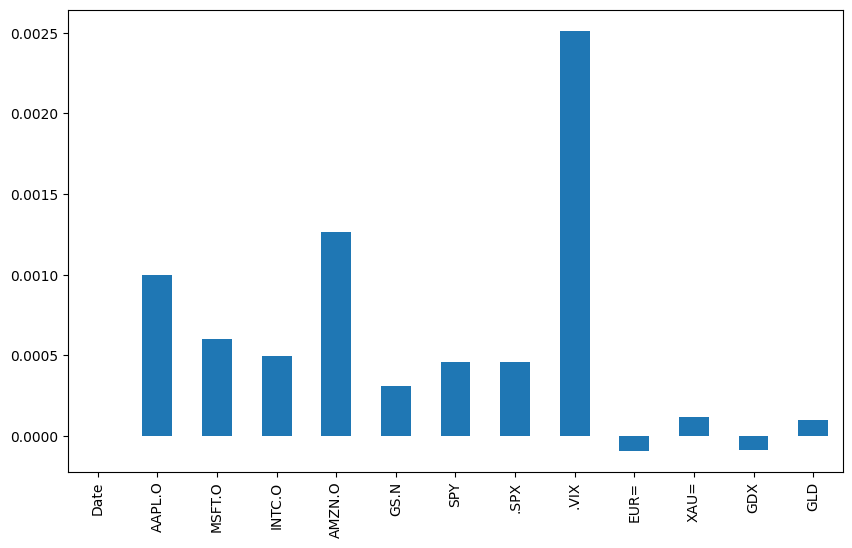

In [16]:
# # data
# data = data.apply(pd.to_numeric, errors='coerce')
# data.pct_change().mean().plot(kind='bar', figsize=(10, 6))

rets               AAPL.O    MSFT.O    INTC.O    AMZN.O      GS.N       SPY  \
Date                                                                     
2010-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-05  0.001727  0.000323 -0.000479  0.005883  0.017525  0.002644   
2010-01-06 -0.016034 -0.006156 -0.003360 -0.018282 -0.010731  0.000704   
2010-01-07 -0.001850 -0.010389 -0.009662 -0.017160  0.019379  0.004212   
2010-01-08  0.006626  0.006807  0.011103  0.026717 -0.019093  0.003322   
...              ...       ...       ...       ...       ...       ...   
2017-10-25 -0.004402 -0.002921 -0.004160 -0.003069 -0.012866 -0.004962   
2017-10-26  0.006373  0.001652  0.013881 -0.000493  0.000041  0.001292   
2017-10-27  0.035203  0.062147  0.071167  0.124131 -0.000041  0.008143   
2017-10-30  0.022259  0.000954 -0.000676  0.008952 -0.003398 -0.003732   
2017-10-31  0.013820 -0.008499  0.024929 -0.005027  0.006579  0.001557   

                .SPX      .VIX  

<Axes: xlabel='Date'>

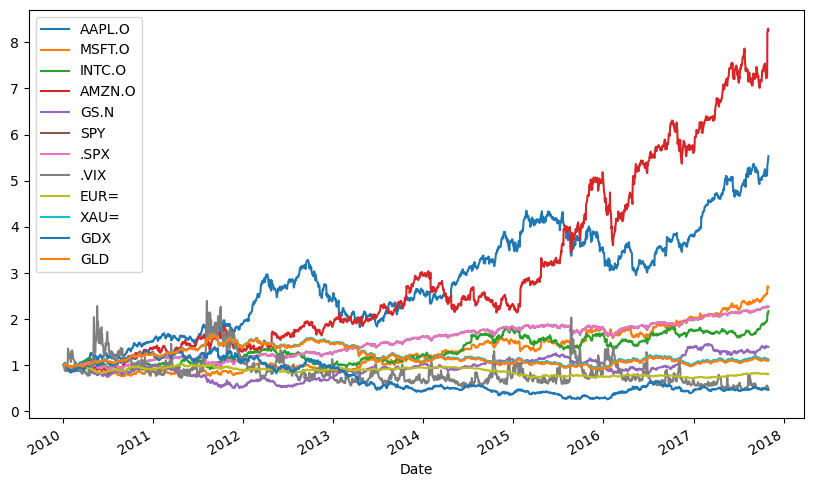

In [7]:
import numpy as np
rets = np.log(data / data.shift(1))
print('rets',rets)
rets.cumsum().apply(np.exp).plot(figsize = (10,6))


<Axes: xlabel='Date'>

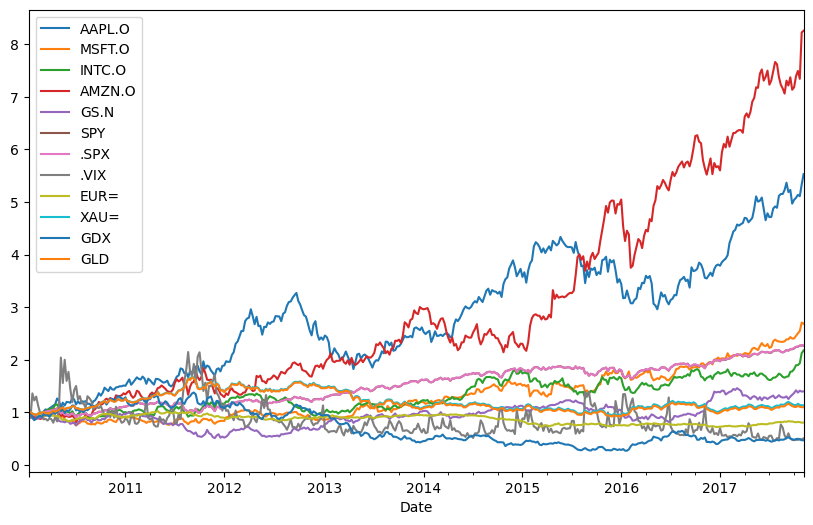

In [9]:
# rets.cumsum().apply(np.exp).plot(figsize = (10,6))
# data['Date'] = pd.to_datetime(data['Date'])
# data.set_index('Date', inplace=True)
data.resample('1w', label='right').last().head()
rets = np.log(data / data.shift(1))
rets.cumsum().apply(np.exp).resample('1w', label='right').last().plot(figsize=(10, 6))

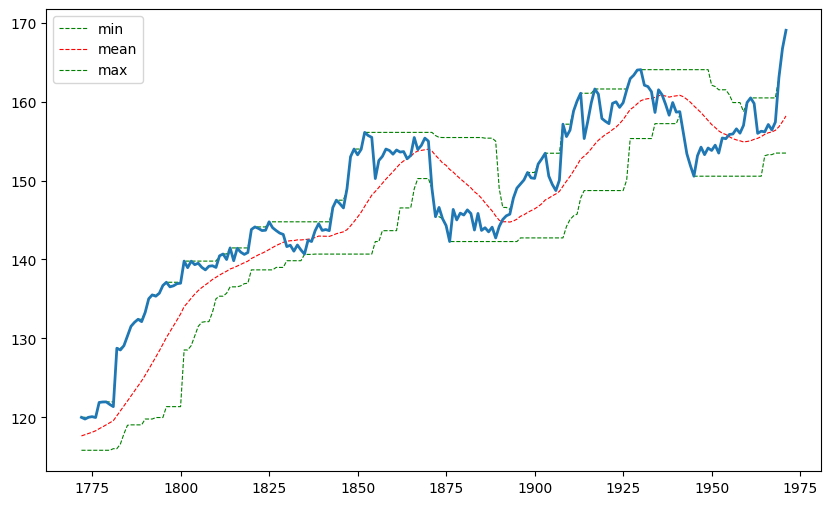

In [2]:
window = 20 
sym='AAPL.O'
data['min'] = data[sym].rolling(window=window).min() 
data['mean'] = data[sym].rolling(window=window).mean() 
data['std'] = data[sym].rolling(window=window).std() 
data['median'] = data[sym].rolling(window=window).median() 
data['max'] = data[sym].rolling(window=window).max() 
data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()
data.dropna().head()
ax = data[['min', 'mean', 'max']].iloc[-200:].plot(
figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8) 
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);

      AAPL.O        SMA1        SMA2
1952  153.48  158.387619  137.453829
1953  155.39  158.306190  137.621845
1954  155.30  158.192381  137.786171
1955  155.84  158.068095  137.951964
1956  155.90  158.081905  138.110099
1957  156.55  158.059762  138.269821
1958  156.00  157.968095  138.423234
1959  156.99  157.858333  138.582004
1960  159.88  157.832857  138.749663
1961  160.47  157.895000  138.919980
1962  159.76  157.948810  139.087798
1963  155.98  157.919524  139.242004
1964  156.25  157.835476  139.397520
1965  156.17  157.744762  139.554544
1966  157.10  157.693095  139.711091
1967  156.41  157.610952  139.862520
1968  157.41  157.514286  140.028472
1969  163.05  157.517619  140.221210
1970  166.72  157.597857  140.431528
1971  169.04  157.717857  140.651766


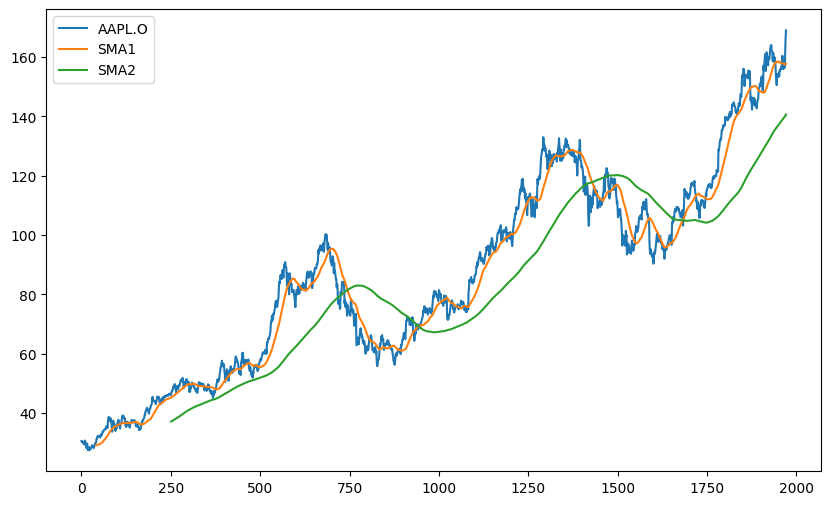

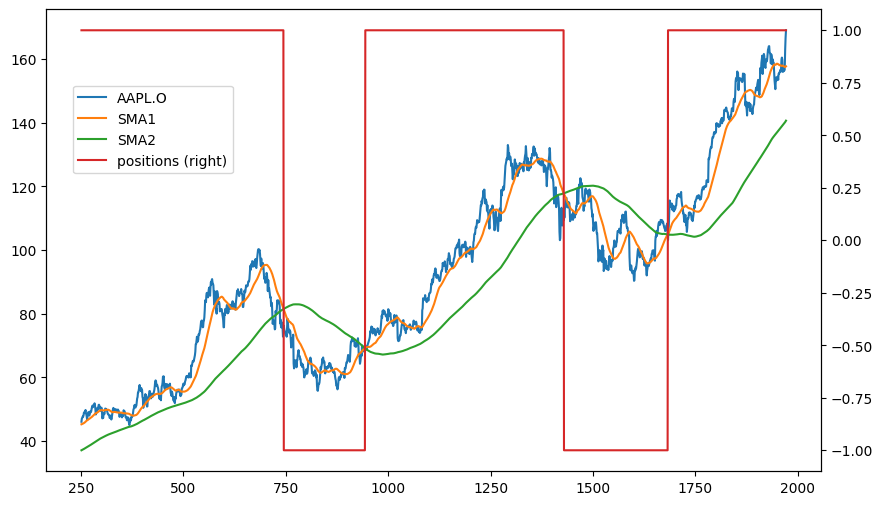

In [3]:
import numpy as np
data['SMA1'] = data[sym].rolling(window=42).mean()
data['SMA2'] = data[sym].rolling(window=252).mean()
print(data[[sym,'SMA1','SMA2']].tail(20))
data[[sym,'SMA1','SMA2']].plot(figsize=(10,6))
data.dropna(inplace=True)
data['positions'] = np.where(data['SMA1'] > data['SMA2'],1,-1)
ax = data[[sym,'SMA1','SMA2','positions']].plot(figsize=(10,6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25,0.85))

<Axes: xlabel='Date'>

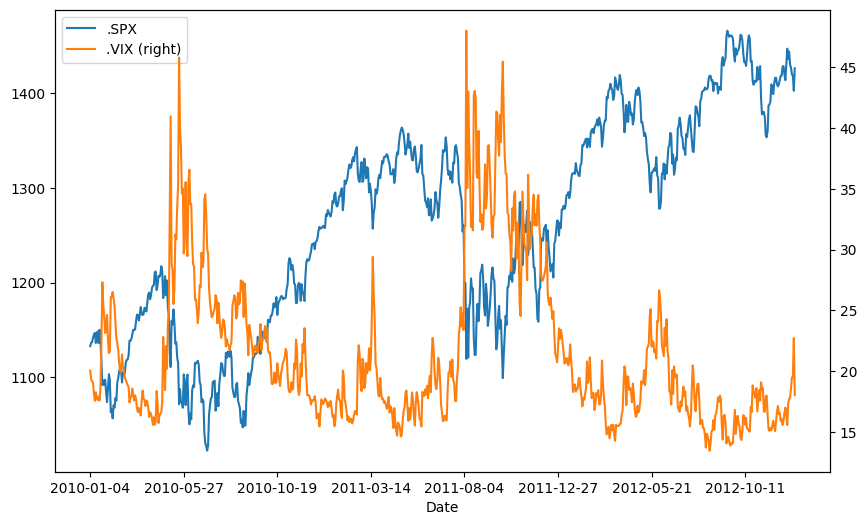

In [12]:
raw = pd.read_csv('/root/quoc/FinanceLearn/data/tr_eikon_eod_data.csv')
data = raw[['Date','.SPX','.VIX']].dropna()
data.set_index('Date',inplace=True)
data.loc[:'2012-12-31'].plot(secondary_y='.VIX',figsize=(10,6))

array([[<Axes: xlabel='.SPX', ylabel='.SPX'>,
        <Axes: xlabel='.VIX', ylabel='.SPX'>],
       [<Axes: xlabel='.SPX', ylabel='.VIX'>,
        <Axes: xlabel='.VIX', ylabel='.VIX'>]], dtype=object)

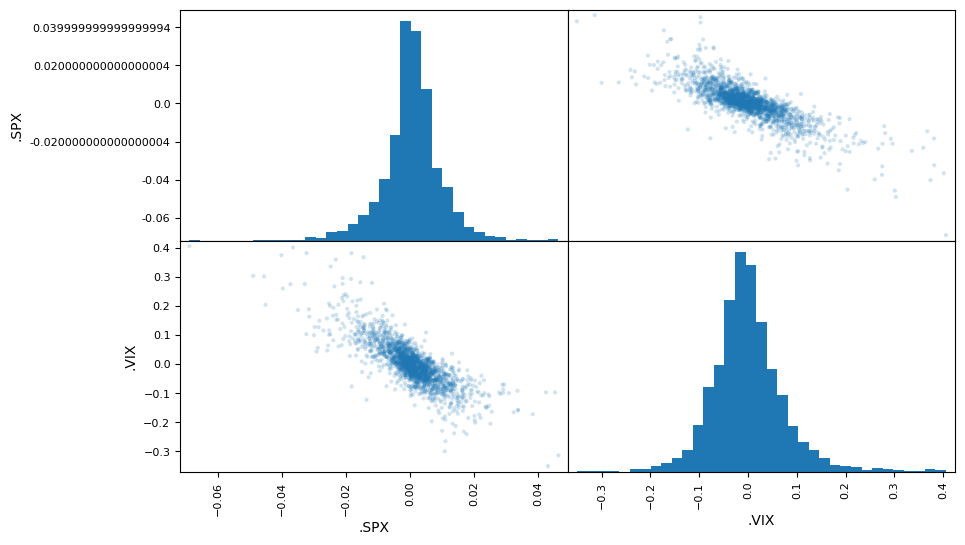

In [15]:
import numpy as np
pd.plotting.scatter_matrix(rets, 
 alpha=0.2, 
 diagonal='hist', 
 hist_kwds={'bins': 35}, 
 figsize=(10, 6))

/root/quoc/charge-back-ai/env/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


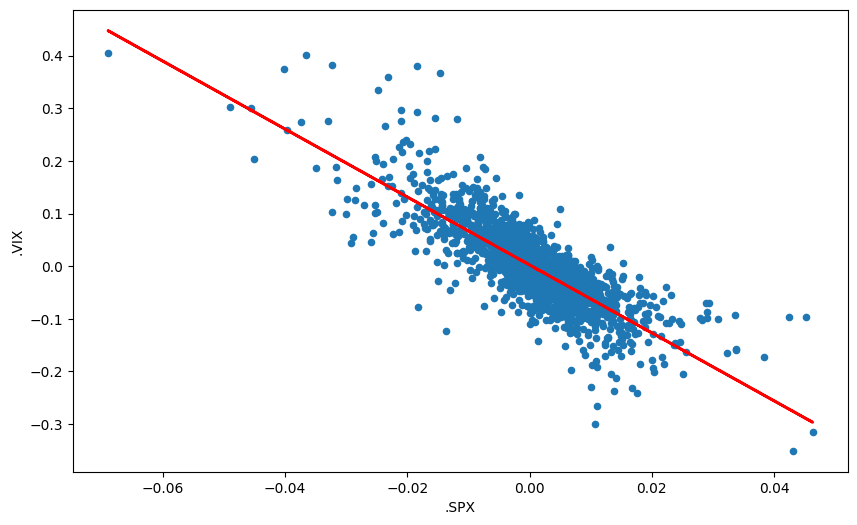

In [23]:
rets = rets.dropna()

reg = np.polyfit(rets['.SPX'], rets['.VIX'], deg=1) 
ax = rets.plot(kind='scatter', x='.SPX', y='.VIX', figsize=(10, 6)) 
ax.plot(rets['.SPX'], np.polyval(reg, rets['.SPX']), 'r', lw=2)

In [24]:
rets.corr()

,.SPX,.VIX
.SPX,1.000000,-0.808372
.VIX,-0.808372,1.000000
